In [116]:
import sqlite3
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS

# Where is metal the most concentrated in the US?

In [9]:
# load state data
state_data = pd.read_csv("State_Data.csv")
state_data

,State,Population,Band_Count,BP100k,State_ID
0,Alabama,5039877,227,4.504078,AL
1,Alaska,732673,64,8.735138,AK
2,Arizona,7276316,804,11.049548,AZ
3,Arkansas,3025891,172,5.684276,AR
4,California,39237836,5548,14.139414,CA
5,Colorado,5812069,848,14.590329,CO
6,Connecticut,3605597,482,13.368105,CT
7,Delaware,1003384,91,9.069309,DE
8,Florida,21781128,1465,6.726006,FL
9,Georgia,10799566,604,5.592817,GA


In [197]:
# create choropleth of bands per state from state_data
fig = px.choropleth(state_data,
                    locations=state_data["State_ID"], 
                    locationmode="USA-states", 
                    scope="usa",
                    color=state_data["BP100k"],
                    color_continuous_scale="Viridis_r")

fig.update_layout(title_text = 'Where Are the Headbangers? (Bands per 100k People by State)',
                  title_font_family="Times New Roman",
                  title_font_size = 22,
                  title_font_color="black", 
                  title_x=0.45, 
                  legend_font_family="Times New Roman")
fig.show()

# Let's explore some metal subgenre history through a stack plot

In [74]:
# load genre by year data
genre_data = pd.read_csv("Genre_by_Year.csv", index_col="Year")
genre_data

,Death,Black,Thrash,Heavy,Doom,Progressive,Melodic,Sludge,Groove,Power,...,Goregrind,Crust,Psychedelic,Folk,Noise,Drone,Post-Black,Funeral,Slam,Avant-garde
Year,,,,,,,,,,,,,,,,,,,,,
1968,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1969,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1971,0,0,0,3,2,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
1972,0,0,0,7,3,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
1973,0,0,0,7,3,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1974,0,0,0,8,3,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
1975,0,0,0,12,2,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
1976,0,0,2,15,3,1,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0


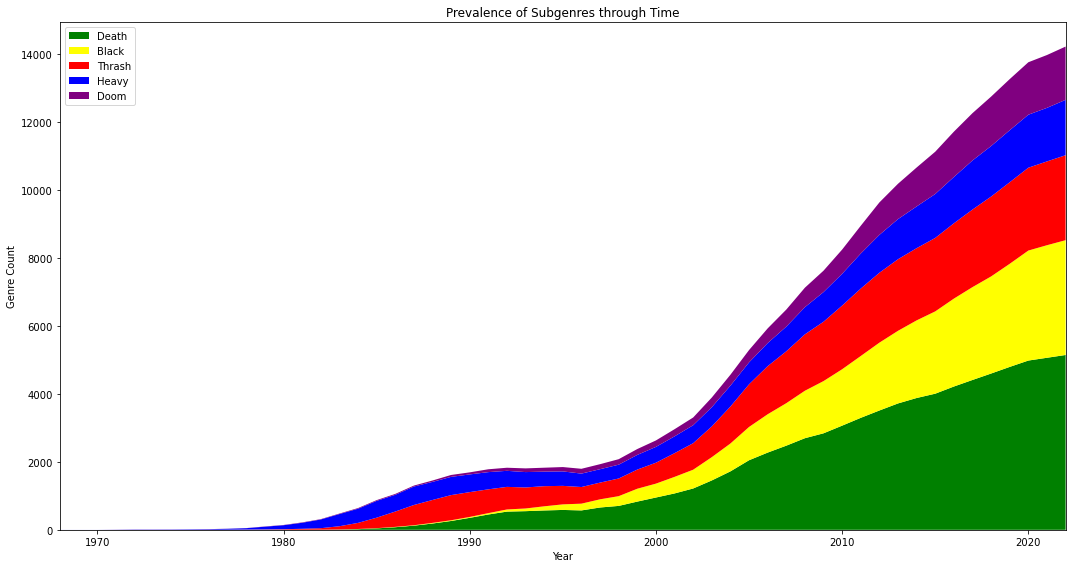

In [63]:
# create sample stack plot
fig, ax = plt.subplots(figsize=(15, 8))

ax.stackplot(genre_data.index, genre_data.Death, genre_data.Black, 
              genre_data.Thrash, genre_data.Heavy, genre_data.Doom, 
              labels=["Death", "Black", "Thrash", "Heavy", "Doom"],
              colors=['green','yellow','red','blue','purple'])

ax.set_title('Prevalence of Subgenres through Time')
ax.legend(loc='upper left')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_xlim(xmin=1968, xmax=2022)
ax.set_xlim(xmin=1968, xmax=2022)

fig.tight_layout()

Text(0.04, 0.5, 'Subgenre Count')

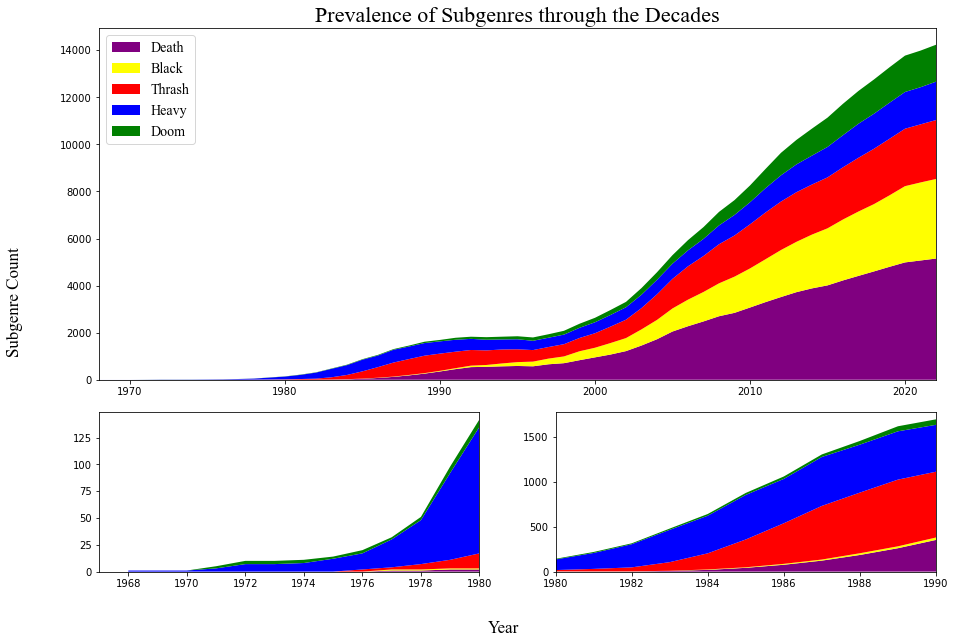

In [199]:
# stack plot to represent changes in metal subgenre composition throughout its history

# create figure
fig = plt.figure(figsize=(15, 10))
gridsize = (3, 2)

# create stack plot for metal history (1968-present)
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)

ax1.stackplot(genre_data.index, genre_data.Death, genre_data.Black, 
              genre_data.Thrash, genre_data.Heavy, genre_data.Doom, 
              labels=["Death", "Black", "Thrash", "Heavy", "Doom"],
              colors=['purple','yellow','red','blue','green'])

ax1.set_title('Prevalence of Subgenres through the Decades', 
              fontsize=22, 
              fontfamily="Times New Roman")
ax1.legend(loc='upper left', 
           prop={"family":"Times New Roman", "size":14})
ax1.set_xlim(xmin=1968, xmax=2022)


# create stackplot for 1968-1980
ax2 = plt.subplot2grid(gridsize, (2, 0))

ax2.stackplot(genre_data.index[:13], genre_data.Death[:13], genre_data.Black[:13], 
              genre_data.Thrash[:13], genre_data.Heavy[:13], genre_data.Doom[:13], 
              labels=["Death", "Black", "Thrash", "Heavy", "Doom"],
              colors=['purple','yellow','red','blue','green'])

ax2.set_xlim(xmin=1967, xmax=1980)


# create stackplot for 1980-1990
ax3 = plt.subplot2grid(gridsize, (2, 1))

ax3.stackplot(genre_data.index[12:23], genre_data.Death[12:23], genre_data.Black[12:23], 
              genre_data.Thrash[12:23], genre_data.Heavy[12:23], genre_data.Doom[12:23], 
              labels=["Death", "Black", "Thrash", "Heavy", "Doom"],
              colors=['purple','yellow','red','blue','green'])

ax3.set_xlim(xmin=1980, xmax=1990)

# set figure labels
fig.text(0.5, 0.04, 'Year', ha='center', fontsize=17, fontfamily="Times New Roman")
fig.text(0.04, 0.5, 'Subgenre Count', va='center', rotation='vertical', fontsize=17, 
         fontfamily="Times New Roman")

# What's US metal all about? Let's make a word cloud of the lyrical themes for fun...

In [117]:
# load original band data
conn = sqlite3.connect('Metal_Bands.db')
band_data = pd.read_sql_query("SELECT * from BAND_INFO", conn)
conn.close()

In [158]:
# let's turn the themes feature into one big string for the word cloud
themes_str = ""
replace = [" (early); ", " (early/later); ", " (mid); ", " (early, later); ",
          " early);", " and "]
remove = [" (mid)", " (later)", " (early)"]

# loop over rows of Lyrical_Themes
for entry in band_data.Lyrical_Themes:
    
    # skip "N/A" entries
    if entry == "N/A":
        continue
    
    # replace necessary substrings with ,
    for elt in replace:
        entry = entry.replace(elt, ",")
    
    # remove necessary substrings
    for elt in remove:
        entry = entry.replace(elt, "")
    
    # split at commas
    entry = entry.split(",")
    
    # concatenate all resulting elements
    for elt in entry:
        themes_str += elt + ", "
        
themes_str

'Depression,  Isolation,  Suicide, Doom,  Death,  Hate, Depression,  Suicide,  Anti-capitalism, Flaws,  Serial killers,  Pizza,  Politics,  Humour, Misanthropy,  Anti-Capitalism, Ranma 1/2,  Negative thoughts, Navajo/Native American mythology,  Diné Bahane\',  Genocide,  History, Gore,  Self-destruction, Instrumental, Sorrow,  Love,  Nature,  Death, Murder,  Insanity, Death,  Technology,  Corruption, Politics,  Humanity, Memes,  Nonsense, Gore, Gore,  War,  Pirates, Anti-religion, Instrumental, Christianity, Hate,  Murder,  Death, Politics, Hate,  Violence,  Death,  Gore, Anarchy, Death,  Nihilism,  Horror, Tragedy, Strength, weakness,  Personal issues, Alienation,  Abuse, Pain,  Life,  Darkness,  Relationships, Death,  Darkness, Inner struggles,  Mankind, Death,  Gore,  Undead, Personal grievance,  Hatred, National Socialism,  White supremacy,  Antisemitism,  Society,  Conspiracy theories, Drugs,  Violence,  Depression,  Anger, Life,  Women,  Sex, Christianity,  Life,  Death, Death,  

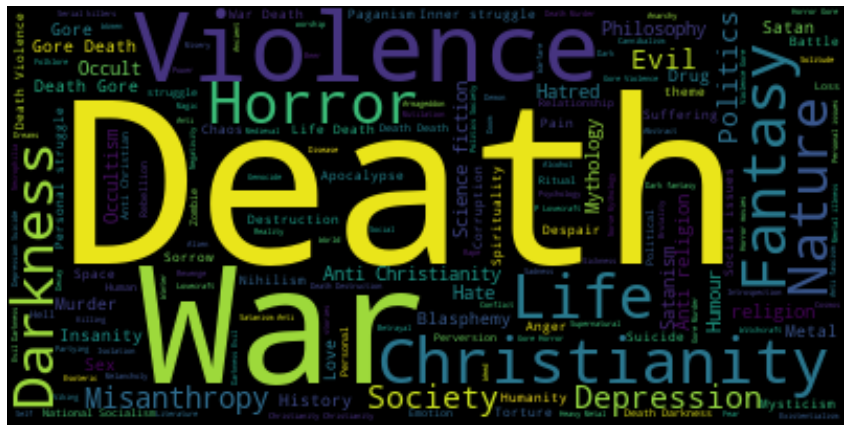

In [198]:
# make the cloud
fig, ax = plt.subplots(figsize=(15, 12))

stopwords = STOPWORDS.update("Instrumental", "Metal", "theme")
cloud = WordCloud(stopwords=stopwords).generate(themes_str)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()
# padding (whitespace) manipulator
fig.tight_layout()